### 練習第九章腐蝕運算

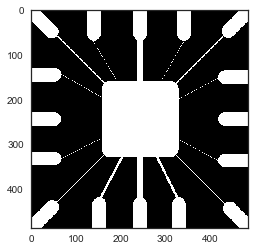

In [21]:
%matplotlib inline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from scipy.linalg import solve
import seaborn as sns
sns.set_style("white")
im = Image.open('C:/Users/user/Documents/DIP/DIP3E_Original_Images_CH09/Fig0905(a)(wirebond-mask).tif')
im = np.asarray(im.convert('L'))
plt.imshow(im)
plt.gray()
plt.show()

C:\Users\user\Summer_Project\lib\site-packages\matplotlib\figure.py:417: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


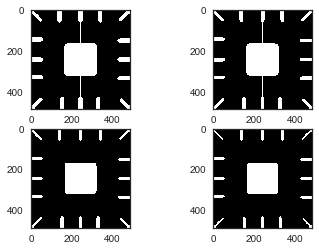

In [8]:
#宣告filter 大小
f,ax = plt.subplots(2,2)
for i in range(4):
    filter_size = (11+2*i,11+2*i)
    half_filter = np.int((filter_size[0]-1)/2)
    average_filter = np.ones(filter_size)/9
    
    #先幫原圖加上padding
    def padwithzeros(vector, pad_width, iaxis, kwargs):
        vector[:pad_width[0]] = 255
        vector[-pad_width[1]:] = 255
        return vector
    padding_f = np.lib.pad(im,half_filter,padwithzeros)
    new_pic = np.zeros(im.shape)
    it = np.nditer(new_pic,flags = ['multi_index'],op_flags = ['readwrite'])
    neighbor_area = np.zeros(filter_size)
    while not it.finished:
        neighbor_area = padding_f[it.multi_index[0]:it.multi_index[0]+filter_size[0] , it.multi_index[1]:it.multi_index[1]+filter_size[0]]
        it[0] = np.min(neighbor_area.flatten())
        it.iternext()
    ax[i/2][i%2].imshow(new_pic)
    
f.show()

### 膨脹練習

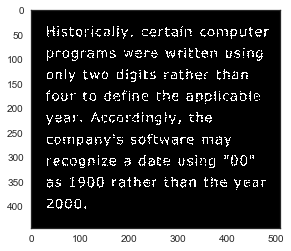

In [9]:
im2 = Image.open('C:/Users/user/Documents/DIP/DIP3E_Original_Images_CH09/Fig0907(a)(text_gaps_1_and_2_pixels).tif')
im2 = np.asarray(im.convert('L'))
plt.imshow(im)
plt.gray()
plt.show()

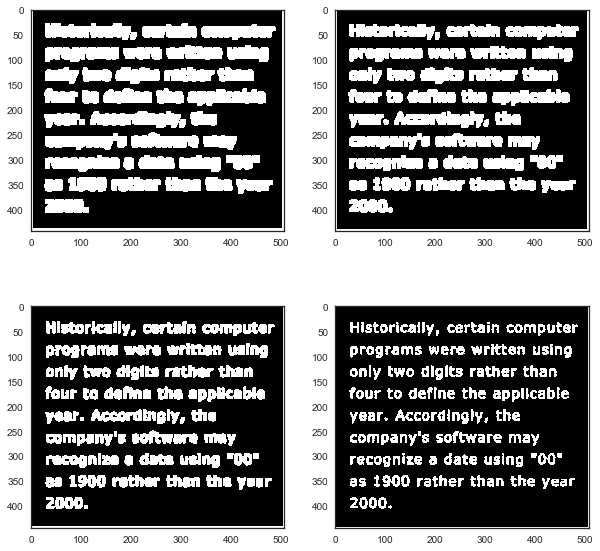

In [16]:
#宣告filter 大小
f,ax = plt.subplots(2,2,figsize=(10,10))
for i in range(4):
    filter_size = (9-2*i,9-2*i)
    half_filter = np.int((filter_size[0]-1)/2)
    average_filter = np.ones(filter_size)/9
    
    #先幫原圖加上padding
    def padwithzeros(vector, pad_width, iaxis, kwargs):
        vector[:pad_width[0]] = 255
        vector[-pad_width[1]:] = 255
        return vector
    padding_f = np.lib.pad(im2,half_filter,padwithzeros)
    new_pic = np.zeros(im.shape)
    it = np.nditer(new_pic,flags = ['multi_index'],op_flags = ['readwrite'])
    neighbor_area = np.zeros(filter_size)
    while not it.finished:
        neighbor_area = padding_f[it.multi_index[0]:it.multi_index[0]+filter_size[0] , it.multi_index[1]:it.multi_index[1]+filter_size[0]]
        it[0] = np.max(neighbor_area.flatten())
        it.iternext()
    ax[i/2][i%2].imshow(new_pic)
    

f.show()

In [23]:
im2 = im.copy()
mask255 = im2==255
mask0 = im2==0
im2[mask255] = 0
im2[mask0] = 255

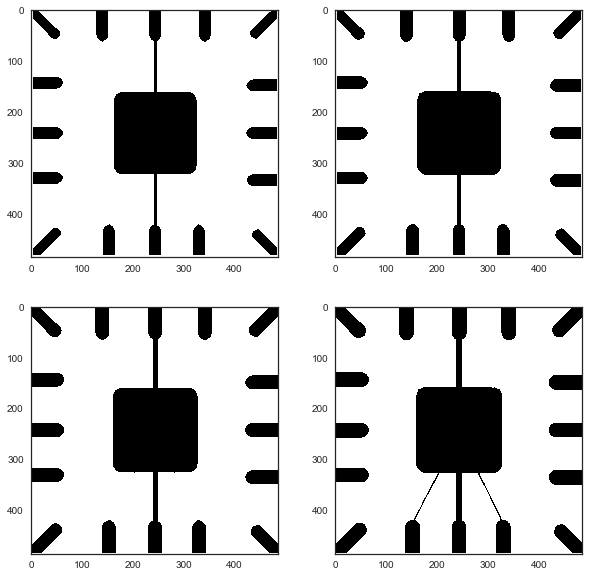

In [24]:
#宣告filter 大小
f,ax = plt.subplots(2,2,figsize=(10,10))
for i in range(4):
    filter_size = (9-2*i,9-2*i)
    half_filter = np.int((filter_size[0]-1)/2)
    average_filter = np.ones(filter_size)/9
    
    #先幫原圖加上padding
    def padwithzeros(vector, pad_width, iaxis, kwargs):
        vector[:pad_width[0]] = 255
        vector[-pad_width[1]:] = 255
        return vector
    padding_f = np.lib.pad(im2,half_filter,padwithzeros)
    new_pic = np.zeros(im.shape)
    it = np.nditer(new_pic,flags = ['multi_index'],op_flags = ['readwrite'])
    neighbor_area = np.zeros(filter_size)
    while not it.finished:
        neighbor_area = padding_f[it.multi_index[0]:it.multi_index[0]+filter_size[0] , it.multi_index[1]:it.multi_index[1]+filter_size[0]]
        it[0] = np.max(neighbor_area.flatten())
        it.iternext()
    ax[i/2][i%2].imshow(new_pic)
    

f.show()